In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
trade = pd.read_csv('international_trade.csv')

In [2]:
full_data= [train, test]
for dataset in full_data:
    display(dataset.head(3))
display(trade .head(3))

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0


,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J


,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127


1. train.csv

train 데이터 : 2019년 01월 01일부터 2023년 03월 03일까지의 유통된 품목의 가격 데이터
item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추
corporation : 유통 법인 코드
법인 A부터 F 존재
location : 지역 코드
J : 제주도 제주시
S : 제주도 서귀포시
supply(kg) : 유통된 물량, kg 단위
price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위


2. international_trade.csv

관련 품목 수출입 정보
중량 단위 kg
금액 단위 천 달러


3. test.csv

test 데이터 : 2023년 03월 04일부터 2023년 03월 31일까지의 데이터


4. sample_submission.csv

제출을 위한 양식
2023년 03월 04일부터 2023년 03월 31일까지의 price(원/kg)을 예측
ID는 품목, 유통 법인, 지역 코드로 구성된 식별자
해당 ID에 맞춰 price(원/kg) 예측값을 answer 컬럼에 기입해야 함

first, check the null

In [3]:
for dataset in full_data :
    print(dataset.isnull().sum())
    print('--------')

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64
--------
ID             0
timestamp      0
item           0
corporation    0
location       0
dtype: int64
--------


create the variable called weather for take a look relarionship between Weather and Price

In [4]:
print(train['timestamp'])

0        2019-01-01
1        2019-01-02
2        2019-01-03
3        2019-01-04
4        2019-01-05
            ...    
59392    2023-02-27
59393    2023-02-28
59394    2023-03-01
59395    2023-03-02
59396    2023-03-03
Name: timestamp, Length: 59397, dtype: object


In [5]:
for dataset in full_data:
    dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
    dataset['Month'] = dataset['timestamp'].dt.month

display( dataset['Month'].head(3));



0    3
1    3
2    3
Name: Month, dtype: int32

In [6]:
dataset.describe()

,timestamp,Month
count,1092,1092.0
mean,2023-03-17 12:00:00,3.0
min,2023-03-04 00:00:00,3.0
25%,2023-03-10 18:00:00,3.0
50%,2023-03-17 12:00:00,3.0
75%,2023-03-24 06:00:00,3.0
max,2023-03-31 00:00:00,3.0
std,NaN,0.0


In [7]:
print(train)

                    ID  timestamp item corporation location  supply(kg)  \
0      TG_A_J_20190101 2019-01-01   TG           A        J         0.0   
1      TG_A_J_20190102 2019-01-02   TG           A        J         0.0   
2      TG_A_J_20190103 2019-01-03   TG           A        J     60601.0   
3      TG_A_J_20190104 2019-01-04   TG           A        J     25000.0   
4      TG_A_J_20190105 2019-01-05   TG           A        J     32352.0   
...                ...        ...  ...         ...      ...         ...   
59392  RD_F_J_20230227 2023-02-27   RD           F        J    452440.0   
59393  RD_F_J_20230228 2023-02-28   RD           F        J    421980.0   
59394  RD_F_J_20230301 2023-03-01   RD           F        J    382980.0   
59395  RD_F_J_20230302 2023-03-02   RD           F        J    477220.0   
59396  RD_F_J_20230303 2023-03-03   RD           F        J    427520.0   

       price(원/kg)  Month  
0              0.0      1  
1              0.0      1  
2           172

In [8]:
for dataset in full_data:    
    dataset.loc[ (dataset['Month'] ==12) | (dataset['Month'] >=1) & (dataset['Month'] <=2) ,'weather'] = 0
    dataset.loc[(dataset['Month'] >2 ) & (dataset['Month'] <=5), 'weather'] = 1
    dataset.loc[(dataset['Month'] >6) & (dataset['Month'] <= 9), 'weather'] = 3
    dataset.loc[(dataset['Month'] > 10) & (dataset['Month'] <= 11), 'weather'] = 4
    



In [9]:
display(train)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),Month,weather
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1,Wn
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,1,Wn
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,1,Wn
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,1,Wn
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1,Wn
...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2,Wn
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2,Wn
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,3,Sp
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,3,Sp


In [10]:
display(train['weather'])

0        Wn
1        Wn
2        Wn
3        Wn
4        Wn
         ..
59392    Wn
59393    Wn
59394    Sp
59395    Sp
59396    Sp
Name: weather, Length: 59397, dtype: object

In [35]:
train=train.rename(columns={'price(원/kg)': 'price(won/kg)'})


In [43]:
for dataset in full_data:
    PassengerId = dataset['Month'].values
    dataset.drop(columns = ['Month'], inplace= True)

<Axes: xlabel='weather', ylabel='price(won/kg)'>

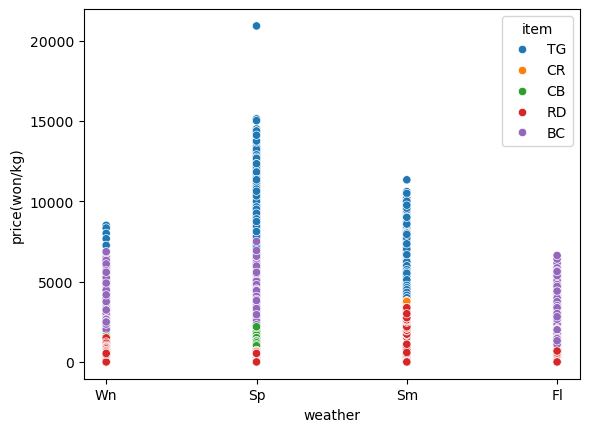

In [44]:
sns.scatterplot(data=train, x='weather', y='price(won/kg)', hue='item')

c:\Users\junun\miniconda3\envs\jun\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


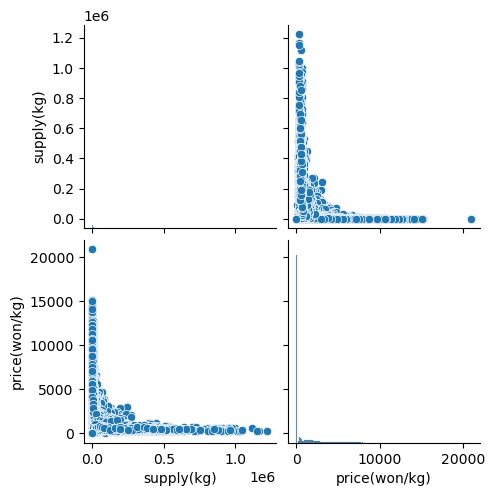

In [46]:
sns.pairplot(train[['supply(kg)','price(won/kg)']])

In [48]:
train[['supply(kg)','price(won/kg)']].corr()

,supply(kg),price(won/kg)
supply(kg),1.000000,-0.002297
price(won/kg),-0.002297,1.000000
